# Lab 1: 
# Linear Regression and Stochastic Gradient Descent
### name：陈涵
### student number：201936380086

## A. closed-form solution of Linear Regression

1. Load the experiment data. You can use load_svmlight_file function in sklearn library.

In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import  train_test_split
import numpy as np
import matplotlib.pyplot as plt

#loda data from svmlight format file
def get_data():
    data = load_svmlight_file("housing_scale.txt")
    return data[0], data[1]

X, y = get_data()
X = X.toarray()
X = np.hstack((np.ones((X.shape[0], 1)), X))

2. Devide dataset. You should divide dataset into training set and validation set using train_test_split function. Test set is not required in this experiment.

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

3. Select a Loss function.

In [3]:
#calculate loss function
def calc_loss(X, y, W):
    loss = 0.5*(np.linalg.norm(y-X.dot(W))**2)
    return loss

4. Get the formula of the closed-form solution

$$W^* = (X^T X)^{-1} X^T Y$$

In [4]:
#solve vector W use closed form
def solve_W_closed_form(X, Y):
    Y = np.array(Y)
    W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return W


5. Get the value of parameter W by the closed-form solution, and update the parameter W.

In [5]:
W_train = solve_W_closed_form(X_train, y_train)
print("closed form solution W")
print(W_train)

closed form solution W
[ 9.80396002 -5.70842301  1.47758936  0.66643874  1.38675239 -3.94603762
 11.40026702 -0.44899433 -7.70259391  2.96425392 -2.60872035 -4.33867811
  2.6145364  -9.37962624]


6. Get the *Loss*, *loss_train* under the training set and *loss_val* by validating under validation set.

In [6]:
loss_train=calc_loss(X_train, y_train, W_train)
loss_val=calc_loss(X_test, y_test, W_train)
Loss=calc_loss(X,y,W_train)

7. Output the value of *Loss*，*loss_train* and *loss_val*.

In [7]:
print("Loss value:")
print(Loss)
print("loss_train value:")
print(loss_train)
print("loss_val value:")
print(loss_val)

Loss value:
5636.7082077152245
loss_train value:
4233.440988955715
loss_val value:
1403.2672187595103


## B. Linear Regression and Stochastic Gradient Descent

1. Load the experiment data. You can use load_svmlight_file function in sklearn library.

In [8]:
X, y = get_data()
X = X.toarray()
X = np.hstack((np.ones((X.shape[0], 1)), X))

2. Devide dataset. You should divide dataset into training set and validation set using train_test_split function. Test set is not required in this experiment.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

3. Initialize linear model parameters. You can choose to set all parameter into zero, initialize it randomly or with normal distribution.

4. Choose loss function and derivation.
$$ \frac{\partial \mathcal{L_D}(W)}{\partial W} = -X^T y + X^T X W$$

5. Calculate G toward loss function from each sample.

6. Denote the opposite direction of gradient G as D.

7. Update model:$$W_t~=W_{t-1} + ηD$$  η is learning rate, a hyper-parameter that we can adjust.

8. Get the loss *loss_train* under the training set and *loss_val* by validating under validation set.

9. Repeate step 5 to 8 for several times, andand output the value of *loss_train* as well as *loss_val*.

<u> 3-9 steps in function below.   </u>

In [10]:
#solve W  vector use gradient descent
def solve_W_stochastic_gradient_descent(X, Y, learning_rate, epoch, batch, X_test, Y_test):
    train_loss = []
    test_loss = []
    Y = Y.reshape(Y.shape[0], 1)
    W = np.random.rand(X.shape[1], 1)
    for i in range(epoch):
        bat = np.random.choice(X.shape[0], batch)
        X_batch = X[bat]
        Y_batch = Y[bat]
        gradient = -X_batch.T.dot(Y_batch) + X_batch.T.dot(X_batch).dot(W)
        gradient = gradient * (1/batch)
        # normnazie
        W = W - learning_rate * gradient
        epoch_train_loss = calc_loss(X, Y, W)
        epoch_test_loss = calc_loss(X_test, Y_test, W)
        train_loss.append(epoch_train_loss)
        test_loss.append(epoch_test_loss)
    #print(loss)
    return W,train_loss, test_loss

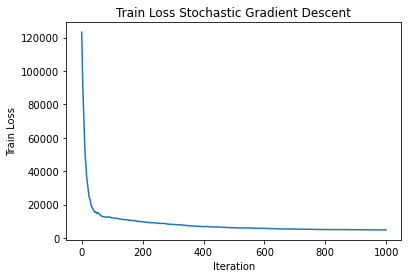

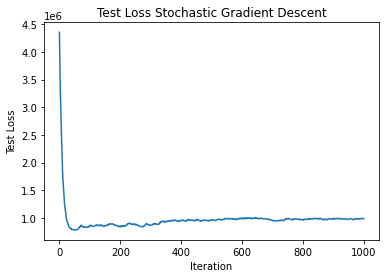

stochastic gradient desent W
[ 7.9875139  -6.81201741 -0.71048418 -1.7836911   1.26436358 -2.20769654
  7.35480538  0.51904758 -4.73345135  1.54173049 -0.42069156 -4.47368868
  3.57781422 -9.03244527]
train Loss:
4784.629165012527
test loss:
1635.082441104777


In [12]:
W_gra, train_loss_gra, test_loss_gra = solve_W_stochastic_gradient_descent(X_train, y_train, 0.01, 1000, 5, X_test, y_test)
plt.figure()
plt.plot(train_loss_gra)
plt.title("Train Loss Stochastic Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Train Loss")
plt.savefig('lab1_sto_sam_train.pdf')
plt.show()
plt.figure()
plt.plot(test_loss_gra)
plt.title("Test Loss Stochastic Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Test Loss")
plt.savefig('lab1_sto_sam_test.pdf')
plt.show()
print("stochastic gradient desent W")
W_gra = W_gra.reshape((W_gra.shape[0], ))
print(W_gra)
print("train Loss:")
print(calc_loss(X_train, y_train, W_gra))
print("test loss:")
print(calc_loss(X_test, y_test, W_gra))